In [1]:
import pandas as pd
import matplotlib as plt
plt.rcParams["figure.figsize"] = (16,9)
plt.rcParams["font.size"] = 20
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from vega_datasets import data

# Importing the SF Temperature Data:

In [2]:
sf = data.sf_temps()
sf.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


# <span style = 'color:blue'>San Francisco Exercises:</span>

## 1. Resample by the day and take the average temperature. Visualize the average temperature over time.

In [3]:
#Setting the date as the index, and sorting the dates in order:
sf = sf.set_index('date').sort_index()
sf

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0
...,...
2010-12-31 19:00:00,50.4
2010-12-31 20:00:00,49.9
2010-12-31 21:00:00,49.4


<AxesSubplot:xlabel='date'>

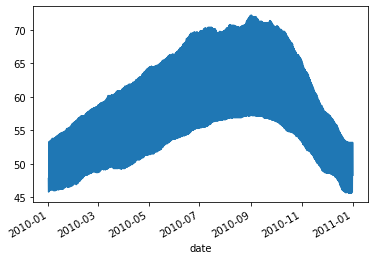

In [4]:
#Plotting the distribution of dates over time:
sf.temp.plot()

<AxesSubplot:xlabel='date'>

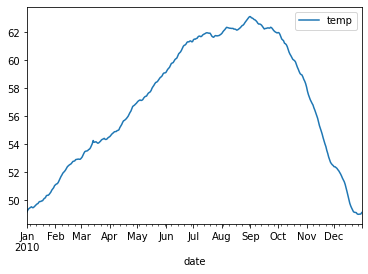

In [5]:
#Resampling the data by day to visualize the data over time:
sf.resample('1D').mean().plot()

## 2. Write the code necessary to visualize the minimum temperature over time.

<AxesSubplot:xlabel='date'>

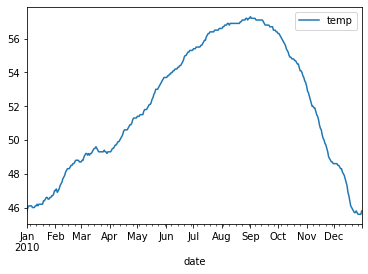

In [6]:
#Visualizing the minimum temp over time by day:
sf.resample('1D').min().plot()

## 3. Write the code necessary to visualize the maximum temperature over time.

<AxesSubplot:xlabel='date'>

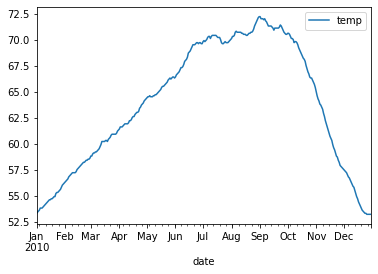

In [7]:
#Visualizing the maximum temp over time by day:
sf.resample('1D').max().plot()

## 4. Which month is the coldest, on average?

In [8]:
#Resampling the data by month and taking the average to find the minimum:
monthly = sf.resample('M').mean()
monthly

,temp
date,
2010-01-31,49.984140
2010-02-28,52.243899
2010-03-31,53.956528
2010-04-30,55.633056
2010-05-31,57.970968
2010-06-30,60.444722
2010-07-31,61.765457
2010-08-31,62.405376
2010-09-30,62.487083


In [9]:
monthly.idxmin()

temp   2010-01-31
dtype: datetime64[ns]

In [10]:
#My original attempt didn't take into account the *mean* temp for each month. 
#I used 'asfreq', which ultimately only returned the minimum value for each month.
#The issue was resolved once I switched to a monthly resample and specified 'mean'.

In [11]:
monthly = sf.resample('M').mean()
monthly

,temp
date,
2010-01-31,49.984140
2010-02-28,52.243899
2010-03-31,53.956528
2010-04-30,55.633056
2010-05-31,57.970968
2010-06-30,60.444722
2010-07-31,61.765457
2010-08-31,62.405376
2010-09-30,62.487083


In [12]:
#Now that monthly has been resampled by the mean temp for each month, I can find the minimum:
monthly[monthly.temp == monthly.temp.min()]

,temp
date,
2010-01-31,49.98414


## 5. Which month has the highest average temperature?

<AxesSubplot:xlabel='date'>

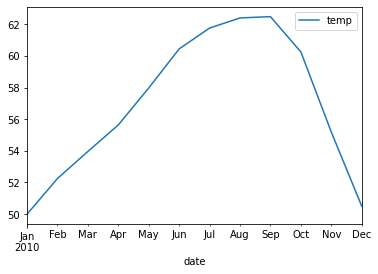

In [13]:
monthly = sf.resample('M').mean()
monthly.plot()

In [14]:
monthly[monthly.temp == monthly.temp.max()]

,temp
date,
2010-09-30,62.487083


## 6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

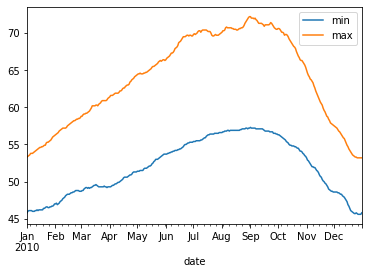

In [15]:
#Resampling the data by day, and creating two columns using .agg to find the min and max:
daily = sf.resample('D').temp.agg(['min', 'max'])

#Plotting the min and max values by day:
daily.plot();

In [16]:
#Creating a column of the range between min and max for each of the days:
daily['diffr'] = daily['max'] - daily['min']

In [17]:
#Finding the date of max range in temperature:
daily[daily['diffr'] == daily['diffr'].max()]

,min,max,diffr
date,,,
2010-08-31,57.2,72.2,15.0


In [18]:
#Creating a dataframe that lists the average range of temps by month:
monthly_range = pd.DataFrame(daily.resample('M').mean().diffr)

In [19]:
#Creating a column in the dataframe that lists the month by name:
monthly_range['month_name'] = monthly_range.index.month_name()

In [20]:
monthly_range

,diffr,month_name
date,,
2010-01-31,8.341935,January
2010-02-28,9.485714,February
2010-03-31,10.854839,March
2010-04-30,12.320000,April
2010-05-31,12.909677,May
2010-06-30,13.950000,June
2010-07-31,13.977419,July
2010-08-31,13.870968,August
2010-09-30,14.403333,September


In [21]:
#Finding the month that had the highest average range in temperatures:
monthly_range[monthly_range.diffr == monthly_range.diffr.max()]

,diffr,month_name
date,,
2010-09-30,14.403333,September


## 7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

<AxesSubplot:xlabel='date'>

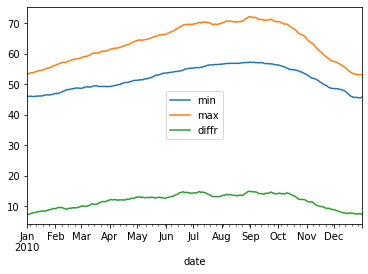

In [22]:
#since I created the relevant columns for this up above, I can just plot the data here:
daily.plot()

# <span style = 'color:blue'>Seattle Exercises:</span>

In [23]:
#Acquiring the data:
sea = data.seattle_weather()
#Setting the dataframe's index to the date:
sea = sea.set_index('date')

sea.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


## 1. Which year and month combination has the highest amount of precipitation?

In [24]:
#Resampling the data by month, and finding the mean precipitation:
monthly_weather = sea.resample('M').mean()

#Creating a boolean mask that will return the month with the highest mean precipitation:
monthly_weather[monthly_weather['precipitation'] == (monthly_weather['precipitation'].max())]

,precipitation,temp_max,temp_min,wind
date,,,,
2015-12-31,9.177419,8.380645,3.825806,4.341935


## 2. Visualize the amount of monthly precipitation over time.

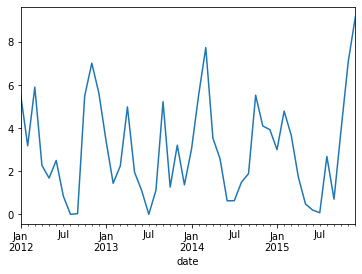

In [25]:
monthly_weather.precipitation.plot();

## 3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.

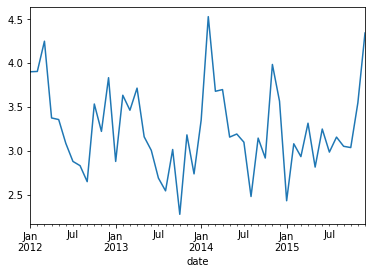

In [26]:
monthly_weather.wind.plot();

## 4. Which year-month combination is the windiest?

In [27]:
#Creating a boolean mask that will return the month with the highest average wind:
monthly_weather[monthly_weather['wind'] == (monthly_weather['wind'].max())]

,precipitation,temp_max,temp_min,wind
date,,,,
2014-02-28,5.542857,8.2,2.635714,4.528571


## 5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [28]:
#Creating a 'year' column that will isolate the year from the date index:
sea['year'] = sea.index.year

sea.head()

,precipitation,temp_max,temp_min,wind,weather,year
date,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,2012
2012-01-02,10.9,10.6,2.8,4.5,rain,2012
2012-01-03,0.8,11.7,7.2,2.3,rain,2012
2012-01-04,20.3,12.2,5.6,4.7,rain,2012
2012-01-05,1.3,8.9,2.8,6.1,rain,2012


In [29]:
# The year with the most sun was 2014.
sea.groupby('year').weather.value_counts()

# I want to come back and find a better way to isolate the maximum value. 
#Can I create another boolean mask somehow to keep the dataframe format?

year  weather
2012  rain       191
      sun        118
      drizzle     31
      snow        21
      fog          5
2013  sun        205
      fog         82
      rain        60
      drizzle     16
      snow         2
2014  sun        211
      fog        151
      rain         3
2015  sun        180
      fog        173
      drizzle      7
      rain         5
Name: weather, dtype: int64

## 6. In which month does it rain the most?

In [30]:
sea['month'] = sea.index.month_name()
sea

,precipitation,temp_max,temp_min,wind,weather,year,month
date,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,2012,January
2012-01-02,10.9,10.6,2.8,4.5,rain,2012,January
2012-01-03,0.8,11.7,7.2,2.3,rain,2012,January
2012-01-04,20.3,12.2,5.6,4.7,rain,2012,January
2012-01-05,1.3,8.9,2.8,6.1,rain,2012,January
...,...,...,...,...,...,...,...
2015-12-27,8.6,4.4,1.7,2.9,fog,2015,December
2015-12-28,1.5,5.0,1.7,1.3,fog,2015,December
2015-12-29,0.0,7.2,0.6,2.6,fog,2015,December


In [31]:
#The month with the most rain was February.
sea.groupby('month').weather.value_counts()

# I want to come back and find a better way to isolate the maximum value. 
#Can I create another boolean mask somehow to keep the dataframe format?
# It becomes a chore to scroll through this list and find which is the highest. 

month      weather
April      sun        61
           fog        34
           rain       20
           drizzle     4
           snow        1
August     sun        94
           fog        16
           drizzle     8
           rain        6
December   fog        54
           sun        40
           rain       23
           snow        5
           drizzle     2
February   rain       40
           fog        36
           sun        30
           drizzle     4
           snow        3
January    fog        38
           rain       35
           sun        33
           drizzle    10
           snow        8
July       sun        89
           rain       14
           fog        13
           drizzle     8
June       sun        85
           rain       19
           fog        14
           drizzle     2
March      sun        42
           rain       37
           fog        36
           snow        6
           drizzle     3
May        sun        82
           fog        25
      

## 7. Which month has the most number of days with a non-zero amount of precipitation?

In [32]:
sea.precipitation

date
2012-01-01     0.0
2012-01-02    10.9
2012-01-03     0.8
2012-01-04    20.3
2012-01-05     1.3
              ... 
2015-12-27     8.6
2015-12-28     1.5
2015-12-29     0.0
2015-12-30     0.0
2015-12-31     0.0
Name: precipitation, Length: 1461, dtype: float64

In [33]:
#Creating a column to show whether it rained on that date:
sea['precipitation_true'] = sea.precipitation > 0

In [34]:
#Grouping by month to find the highest number of rainy days by month:
sea.groupby('month').precipitation_true.sum().sort_values(ascending = False).head(1)

month
December    81
Name: precipitation_true, dtype: int64

It is worth considering some possible alternate interpretations of this question:
- could it be asking which individual month (rather than *all* Decembers, for example?)
- in class, the exercise was completed by finding the highest mean # of rainy days in a month
    - it works out in this case, but that could have been misleading, because not all months have the same number of days. So I went with the actual count of rainy days in my answer. 


# <span style = 'color:blue'>Flight Data Exercises:</span>

In [35]:
#Acquiring the flight data:
fly = data.flights_20k()

#Setting the index to the date values:
fly = fly.set_index('date')
fly

,delay,distance,origin,destination
date,,,,
2001-01-13 14:56:00,32,417,SAN,SJC
2001-01-31 16:40:00,-5,1093,FLL,ISP
2001-02-11 18:39:00,3,293,LBB,DAL
2001-01-10 21:00:00,-15,550,MSY,MCO
2001-03-30 21:45:00,-2,229,STL,IND
...,...,...,...,...
2001-03-22 15:10:00,4,446,SAN,OAK
2001-01-19 13:05:00,-6,1489,SEA,MCI
2001-02-07 11:37:00,-16,1848,MCO,PHX


## 1. Convert any negative delays to 0.

In [36]:
#Selecting loc via a boolean array to select delays that are less than 0, and passing the 'delay' label as an argument to set all applicable values to 0:
fly.loc[fly.delay < 0, 'delay'] = 0

In [37]:
fly

,delay,distance,origin,destination
date,,,,
2001-01-13 14:56:00,32,417,SAN,SJC
2001-01-31 16:40:00,0,1093,FLL,ISP
2001-02-11 18:39:00,3,293,LBB,DAL
2001-01-10 21:00:00,0,550,MSY,MCO
2001-03-30 21:45:00,0,229,STL,IND
...,...,...,...,...
2001-03-22 15:10:00,4,446,SAN,OAK
2001-01-19 13:05:00,0,1489,SEA,MCI
2001-02-07 11:37:00,0,1848,MCO,PHX


## 2. Which hour of the day has the highest average delay?

In [38]:
#Creating an hour column from the date:
fly['hour'] = fly.index.hour
fly

,delay,distance,origin,destination,hour
date,,,,,
2001-01-13 14:56:00,32,417,SAN,SJC,14
2001-01-31 16:40:00,0,1093,FLL,ISP,16
2001-02-11 18:39:00,3,293,LBB,DAL,18
2001-01-10 21:00:00,0,550,MSY,MCO,21
2001-03-30 21:45:00,0,229,STL,IND,21
...,...,...,...,...,...
2001-03-22 15:10:00,4,446,SAN,OAK,15
2001-01-19 13:05:00,0,1489,SEA,MCI,13
2001-02-07 11:37:00,0,1848,MCO,PHX,11


In [48]:
#Finding the mean values for delay and distance by hour of the day and creating a dataframe:
hourly_delay = fly.groupby('hour').mean()
hourly_delay

,delay,distance,day
hour,,,
0,127.916667,424.583333,2.833333
1,170.000000,256.000000,4.000000
3,302.500000,322.000000,2.500000
5,0.513514,327.702703,2.162162
6,2.494856,448.913580,2.462963
7,3.071932,530.179126,2.791961
8,4.030483,558.536059,2.771747
9,5.002504,563.075125,2.878130
10,5.850953,513.748700,2.909012


In [51]:
hourly_delay[hourly_delay.delay == hourly_delay.delay.max()]

,delay,distance,day
hour,,,
3,302.5,322.0,2.5


## 3. Does the day of the week make a difference in the delay amount?

In [65]:
#creating a 'day' column from the date index:
fly['day'] = fly.index.day_name()

In [66]:
fly.head()

,delay,distance,origin,destination,hour,day,month
date,,,,,,,
2001-01-13 14:56:00,32,417,SAN,SJC,14,Saturday,January
2001-01-31 16:40:00,0,1093,FLL,ISP,16,Wednesday,January
2001-02-11 18:39:00,3,293,LBB,DAL,18,Sunday,February
2001-01-10 21:00:00,0,550,MSY,MCO,21,Wednesday,January
2001-03-30 21:45:00,0,229,STL,IND,21,Friday,March


In [80]:
#It appears that Fridays have the highest average delays, so it does appear that weekday affects delays.
daily_mean = fly.groupby('day').mean()
daily_mean

#I want to come back and try to figure out how to order this by the weekday index.

,delay,distance,hour
day,,,
Friday,17.757596,501.118230,13.667107
Monday,7.165772,505.032215,13.454362
Saturday,8.431498,550.889031,13.010670
Sunday,10.413542,507.987758,14.236419
Thursday,12.821322,485.175025,13.619728
Tuesday,9.410866,496.021732,13.397963
Wednesday,11.032478,501.009094,13.588828


## 4. Does the month make a difference in the delay amount?

In [44]:
#Creating a 'month' column from the date index:
fly['month'] = fly.index.month_name()
fly

,delay,distance,origin,destination,hour,day,month
date,,,,,,,
2001-01-13 14:56:00,32,417,SAN,SJC,14,5,January
2001-01-31 16:40:00,0,1093,FLL,ISP,16,2,January
2001-02-11 18:39:00,3,293,LBB,DAL,18,6,February
2001-01-10 21:00:00,0,550,MSY,MCO,21,2,January
2001-03-30 21:45:00,0,229,STL,IND,21,4,March
...,...,...,...,...,...,...,...
2001-03-22 15:10:00,4,446,SAN,OAK,15,3,March
2001-01-19 13:05:00,0,1489,SEA,MCI,13,4,January
2001-02-07 11:37:00,0,1848,MCO,PHX,11,2,February


In [52]:
#Finding the mean values for delay and distance by hour of the day and creating a dataframe:
monthly_delay = fly.groupby('month').mean()
monthly_delay

,delay,distance,hour,day
month,,,,
February,12.306106,511.156170,13.644182,2.913203
January,11.301592,500.391952,13.552771,2.758255
March,9.875287,504.712069,13.531897,2.975575


In [54]:
#Creating a boolean mask to select the month with the highest average delay:
monthly_delay[monthly_delay.delay == monthly_delay.delay.max()]

,delay,distance,hour,day
month,,,,
February,12.306106,511.15617,13.644182,2.913203


In [82]:
monthly_mean = fly.groupby('month').mean()
monthly_mean

#It appears that there is indeed a relationship between month and mean delay duration.

#I want to come back and try to order this by the month index. 

,delay,distance,hour
month,,,
February,12.306106,511.156170,13.644182
January,11.301592,500.391952,13.552771
March,9.875287,504.712069,13.531897
